# Accessing and Visualizing ISR Data
Welcome to the Incoherent Scatter Radar Summer School!  This tutorial will walk you through the basic process of accessing data from ISRs and plotting it.  It covers:
- Downloading data from the Madrigal database
- Reading ISR data files in the hdf5 format
- Creating RTI plots

## Madrigal
[Madrigal](http://cedar.openmadrigal.org/) is a database that hosts incoherent scatter radar data as well as a variety of other datasets used in upper atmosphere reasearch.  You can access Madrigal data by browsing through available instruments and experiments on the Madrigal website and downloading specific files.  Madrigal also provides software that will help you download the correct data files automatically given an instrument and time range. Madrigal tracks usage, so you must set your name, email address, and institutional affiliation.

The simplest way to download data files is to use the Madrigal [chooseScript](http://cedar.openmadrigal.org/chooseScript/) tool to generate a command.  First, download the [Madrigal APIs](http://cedar.openmadrigal.org/madrigalDownload/).  Then, use [chooseScript](http://cedar.openmadrigal.org/chooseScript/) to generate the proper command and simply enter it at a command prompt.

In [2]:
# """
user_fullname = 'Leslie Lamarche'
user_email = 'leslie.lamarche@sri.com'
user_affiliation = 'SRI International'
# """

# user_fullname = CHANGE_ME
# user_email = CHANGE_ME
# user_affiliation = CHANGE_ME

### madrigalWeb
Alternatively, Madrigal also offers the python package [madrigalWeb](http://cedar.openmadrigal.org/docs/name/rr_python.html) if you wish to write scripts that will perform more advanced queries. 

[Install madrigalWeb](https://pypi.org/project/madrigalWeb/):
```
pip install madrigalWeb
```

The following example demonstrates how to use madrigalWeb to download a data file for the Poker Flat Incoherent Scatter Radar (PFISR). First, set the start time and end time of the period to download data for. For this example, we'll be focusing on the early hours of March 17, 2019, where the [Kp index](https://www.spaceweatherlive.com/en/archive/2019/03/17/kp) indicates moderate geomagnetic disturbance.

In [3]:
import datetime as dt
st = dt.datetime(2019,3,17,0,0,0)
et = dt.datetime(2019,3,17,3,0,0)

Import madrigalWeb and initialize a MadrigalData object.  This estabilishes a connection with a Madrigal website.  

In [5]:
import madrigalWeb.madrigalWeb

maddat =  madrigalWeb.madrigalWeb.MadrigalData('http://cedar.openmadrigal.org/')

Identify the instrument code for PFISR by refering to the [Madrigal Instrument Metadata](http://cedar.openmadrigal.org/instMetadata/).  PFISR has instrument code 61.  Use this code and the start and end time to identify any PFISR experiments that were run in this period. In this case, only one experiment was found.

In [6]:
instrument_code = 61 # http://cedar.openmadrigal.org/instMetadata/
expList = maddat.getExperiments(instrument_code, st.year, st.month, st.day, st.hour, st.minute, st.second, et.year, et.month, et.day, et.hour, et.minute, et.second)
for exp in expList:
    print(exp)

id: 100254741
realUrl: http://cedar.openmadrigal.org/showExperiment/?experiment_list=100254741
url: http://cedar.openmadrigal.org/madtoc/experiments4/2019/pfa/16mar19b
name: IPY27_Tracking_v03 - Long duration measurements in support of the International Polar Year
siteid: 10
sitename: CEDAR
instcode: 61
instname: Poker Flat IS Radar
startyear: 2019
startmonth: 3
startday: 16
starthour: 5
startmin: 20
startsec: 59
endyear: 2019
endmonth: 3
endday: 18
endhour: 1
endmin: 40
endsec: 4
isLocal: True
madrigalUrl: http://cedar.openmadrigal.org/
PI: Asti Bhatt
PIEmail: asti.bhatt@sri.com
uttimestamp: 1560383625
access: 0
Madrigal version: 3.2



Now use the experiment id to generate a list of files associated with this experiment.

In [7]:
fileList = maddat.getExperimentFiles(expList[0].id)
for file in fileList:
    print(file)

name: /opt/cedar3/experiments4/2019/pfa/16mar19b/pfa190316.001.hdf5
kindat: 5961
kindatdesc: Long Pulse Uncorrected Ne
category: 1
status: final
permission: 0
expId: 100254741
doi: https://w3id.org/cedar?experiment_list=experiments4/2019/pfa/16mar19b&file_list=pfa190316.001.hdf5

name: /opt/cedar3/experiments4/2019/pfa/16mar19b/pfa190316.002.hdf5
kindat: 5950
kindatdesc: Long Pulse (480)
category: 1
status: final
permission: 0
expId: 100254741
doi: https://w3id.org/cedar?experiment_list=experiments4/2019/pfa/16mar19b&file_list=pfa190316.002.hdf5

name: /opt/cedar3/experiments4/2019/pfa/16mar19b/pfa190316.003.hdf5
kindat: 5962
kindatdesc: Alternating Code Uncorrected Ne
category: 1
status: final
permission: 0
expId: 100254741
doi: https://w3id.org/cedar?experiment_list=experiments4/2019/pfa/16mar19b&file_list=pfa190316.003.hdf5

name: /opt/cedar3/experiments4/2019/pfa/16mar19b/pfa190316.004.hdf5
kindat: 5951
kindatdesc: Alternating Code (AC16-30)
category: 1
status: final
permission: 0


There are 5 files associated with this exeriment.  Long Pulse, Alternating Code, and Vector velocity from Long Pulse are three data products that each contain different information about thie ionosphere in the PFISR field of view.  The details of these will be discussed later, but for now, download all three data files.  This requires your credentials, which were set earlier.

In [8]:
result = maddat.downloadFile(fileList[1].name, 'LongPulse_data.hdf5', user_fullname, user_email, user_affiliation, 'hdf5')
result = maddat.downloadFile(fileList[3].name, 'AlternatingCode_data.hdf5', user_fullname, user_email, user_affiliation, 'hdf5')
result = maddat.downloadFile(fileList[4].name, 'VectorVelocity_data.hdf5', user_fullname, user_email, user_affiliation, 'hdf5')

## Reading hdf5 file
Hierarchical Data Format (HDF) is a file format designed to handle large sets of multidimensional data. The [h5py](https://www.h5py.org/) package is a good way to easily read data from these files.  Try this with the AlternatingCode_data.hdf5 file that was just downloaded.

In [9]:
import h5py

This PFISR mode has multiple beams.  Iterate over all of them and create a dictionary with the beam ID, range, times, and electron density for each beam.

In [11]:
with h5py.File('AlternatingCode_data.hdf5', 'r') as f:

    AlternatingCode_data = []
    for dat in f['Data/Array Layout'].values():
        print(dat['2D Parameters'].keys())
        bid = dat['1D Parameters/beamid'][0]
        ne = dat['2D Parameters/nel'][:]
        rng = dat['range'][:]
        tstmp = dat['timestamps'][:]
        time = [dt.datetime.utcfromtimestamp(t) for t in tstmp]
        AlternatingCode_data.append({'beamid':bid, 'density':ne, 'range':rng, 'time':time})

<KeysViewHDF5 ['Data Parameters', 'cgm_lat', 'cgm_long', 'dnel', 'dpo+', 'dte', 'dti', 'dvo', 'gdalt', 'nel', 'po+', 'te', 'ti', 'vo']>
<KeysViewHDF5 ['Data Parameters', 'cgm_lat', 'cgm_long', 'dnel', 'dpo+', 'dte', 'dti', 'dvo', 'gdalt', 'nel', 'po+', 'te', 'ti', 'vo']>
<KeysViewHDF5 ['Data Parameters', 'cgm_lat', 'cgm_long', 'dnel', 'dpo+', 'dte', 'dti', 'dvo', 'gdalt', 'nel', 'po+', 'te', 'ti', 'vo']>
<KeysViewHDF5 ['Data Parameters', 'cgm_lat', 'cgm_long', 'dnel', 'dpo+', 'dte', 'dti', 'dvo', 'gdalt', 'nel', 'po+', 'te', 'ti', 'vo']>


## Create RTI Plots
RTI (Range-Time-Intensity) plots are a common and convenient way of looking at radar data.  It is relatively straight forward to create one with matplotlib's [pcolormesh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) function.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

The line `%matplotlib inline` is required for plots to display correctly in jupyter notebooks.

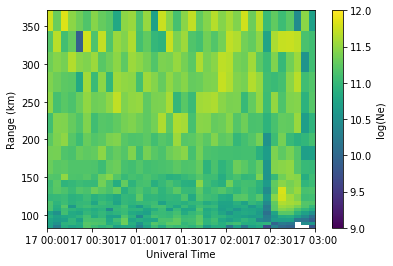

In [10]:
beam0 = AlternatingCode_data[0]

f = plt.pcolormesh(beam0['time'],beam0['range'],beam0['density'], vmin=9.0, vmax=12.0)
plt.xlim(st,et)
plt.xlabel('Univeral Time')
plt.ylabel('Range (km)')
cbar = plt.colorbar(f)
cbar.set_label('log(Ne)')

## Alternating Code Data
Alternating Code data has a high spatial resolution but is most sensitive at low altitudes.  It's best for doing studies involving the E region.  The Alternating Code data file has already been read in the "Reading hdf5 file" section above, so we can create RTI plots for all the beams. 

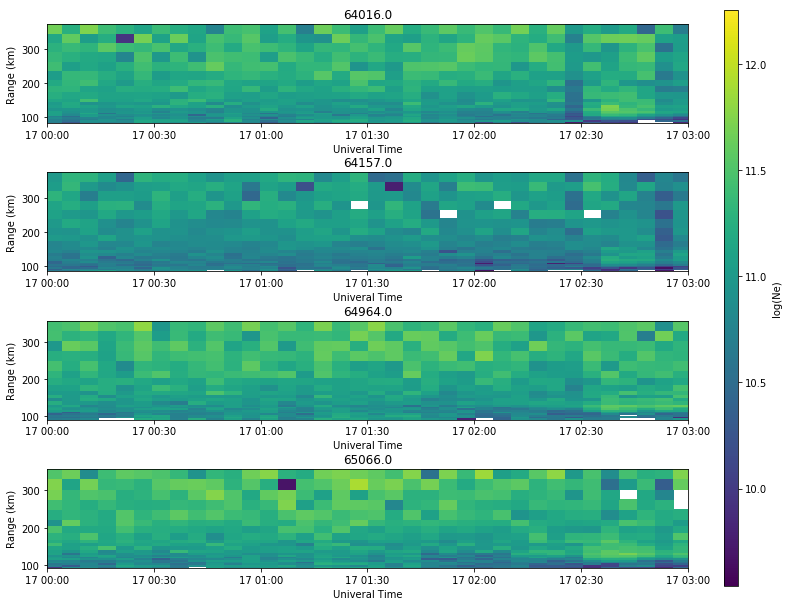

In [11]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(len(AlternatingCode_data),1)
gs.update(left=0.01,right=0.9,hspace=0.5)

for i,dat in enumerate(AlternatingCode_data):
    ax = plt.subplot(gs[i])
    f = ax.pcolormesh(dat['time'],dat['range'],dat['density'])
    ax.set_xlim(st,et)
    ax.set_xlabel('Univeral Time')
    ax.set_ylabel('Range (km)')
    ax.set_title(dat['beamid'])

cax = fig.add_axes([0.95,0.1,0.02,0.8])
cbar = plt.colorbar(f, cax=cax)
cbar.set_label('log(Ne)')

## Long Pulse Data
Long Pulse data has lower range resolution, but is more sensitive at higher altitudes, so it is usually used for F region studies.  The file format of Long Pulse data is idential to that of Alternating Code data, so it can be read in and plotted in exactly the same way.

In [12]:
with h5py.File('LongPulse_data.hdf5', 'r') as f:

    LongPulse_data = []
    for dat in f['Data/Array Layout'].values():
        bid = dat['1D Parameters/beamid'][0]
        ne = dat['2D Parameters/nel'][:]
        rng = dat['range'][:]
        tstmp = dat['timestamps'][:]
        time = [dt.datetime.utcfromtimestamp(t) for t in tstmp]
        LongPulse_data.append({'beamid':bid, 'density':ne, 'range':rng, 'time':time})

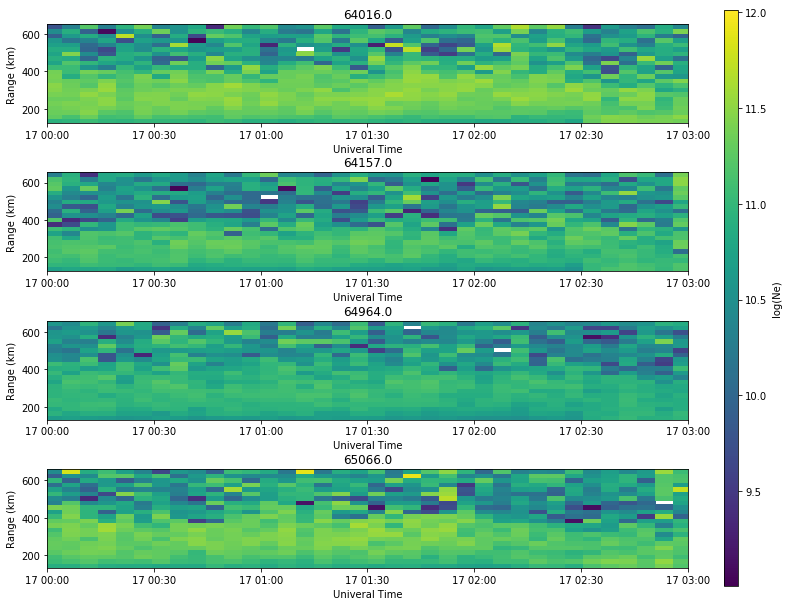

In [13]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(len(LongPulse_data),1)
gs.update(left=0.01,right=0.9,hspace=0.5)

for i,dat in enumerate(LongPulse_data):
    ax = plt.subplot(gs[i])
    f = ax.pcolormesh(dat['time'],dat['range'],dat['density'])
    ax.set_xlim(st,et)
    ax.set_xlabel('Univeral Time')
    ax.set_ylabel('Range (km)')
    ax.set_title(dat['beamid'])

cax = fig.add_axes([0.95,0.1,0.02,0.8])
cbar = plt.colorbar(f, cax=cax)
cbar.set_label('log(Ne)')

## Vector Velocity Data
Long Pulse data includes line-of-sight plasma velocity measurements from the F region.  If we assume the plasma drifts do not vary much over the field-of-view, the plasma velocity measuments from different directions can be combined to resolve the true $E\times B$ plasma drift velocity vector [[Heinselman and Nicolls,2008](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2007RS003805)].  The Vector Velocity data files include the magnetic East and Magnetic North components of this vector, which are useful to look at for flow reversals.  Typically, velocity vectors are calculated from several portions of the field-of-view, so a profile in magnetic latitude is formed, but because data from all beams is combined, there is only a single profile for the entire field-of-view.

In [16]:
with h5py.File('VectorVelocity_data.hdf5', 'r') as f:
    VE = f['Data/Array Layout/2D Parameters/vipe'][:]
    VN = f['Data/Array Layout/2D Parameters/vipn'][:]
    mlat = f['Data/Array Layout/cgm_lat'][:]
    tstmp = f['Data/Array Layout/timestamps'][:]
    time = [dt.datetime.utcfromtimestamp(t) for t in tstmp]

Now, plot the East and North components against magnetic Latitude to see how they vary in time.

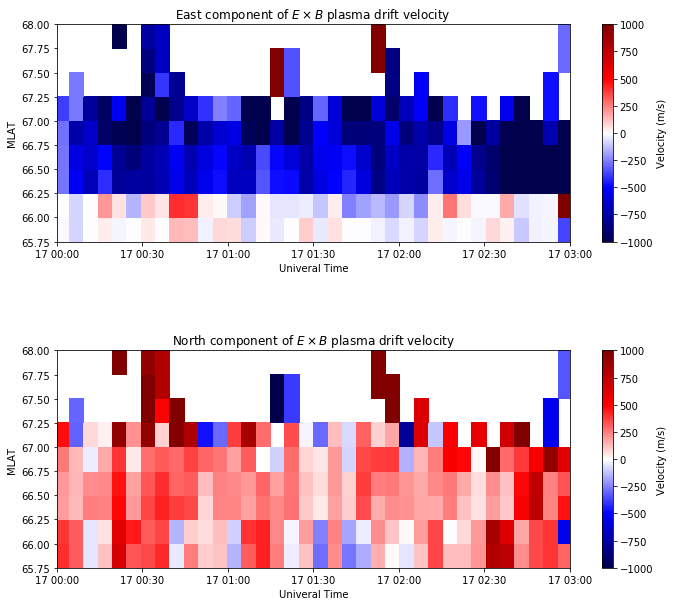

In [17]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2,1)
gs.update(left=0.01,right=0.9,hspace=0.5)

ax = plt.subplot(gs[0])
f = ax.pcolormesh(time,mlat,VE,vmin=-1000,vmax=1000,cmap=plt.get_cmap('seismic'))
ax.set_xlim(st,et)
ax.set_xlabel('Univeral Time')
ax.set_ylabel('MLAT')
ax.set_title(r'East component of $E\times B$ plasma drift velocity')
cbar = plt.colorbar(f)
cbar.set_label('Velocity (m/s)')

ax = plt.subplot(gs[1])
f = ax.pcolormesh(time,mlat,VN,vmin=-1000,vmax=1000,cmap=plt.get_cmap('seismic'))
ax.set_xlim(st,et)
ax.set_xlabel('Univeral Time')
ax.set_ylabel('MLAT')
ax.set_title(r'North component of $E\times B$ plasma drift velocity')
cbar = plt.colorbar(f)
cbar.set_label('Velocity (m/s)')
